## Travail Personnel 2 : " Traffic flow ".

---


L'objectif de ce nouveau travail personnel est de réussir à modéliser et à décrire le système qu'est le flux de la circulation sur une route à une seule voie.

Pour se faire, nous nous plaçerons ici dans le cas d'un trafic instable pour lequel nous pouvons utiliser l'équation de convection non-linéaire de la densité de voiture. En outre, nous procèderons à 2 simulations distinctes afin de mieux comprendre l'évolution de notre système sous différente conditions initiales (CI) et aux bords/limites (CL) pour la densité de trafic. Nous aurons ainsi les 2 ensemble de conditions suivant :

Première simulation :

$$
\left.
    \begin{array}{ll}
         & x = numpy.linspace(0,L,nx)\\
         & rho0  = numpy.ones(nx).10\\
         & rho0[10:20]  = 50\\
    \end{array}
\right \} \text{  (CI) }
$$


$$
\left.
    \begin{array}{ll}
         & \rho(0,t) = 10
    \end{array}
\right \} \text{  (CL)}
$$

Seconde simulation :

$$
\left.
    \begin{array}{ll}
         & x = numpy.linspace(0,L,nx)\\
         & rho0  = numpy.ones(nx).20\\
         & rho0[10:20]  = 50\\
    \end{array}
\right \} \text{  (CI) }
$$


$$
\left.
    \begin{array}{ll}
         & \rho(0,t) = 20
    \end{array}
\right \} \text{  (CL)}
$$

Commençons sans plus tarder par le traitement de nos équations.

##### 1. Réécriture de l'équation de convection non-linéaire de la densité de voiture & discrétisation. 
---

**1.1 Un bref rappel théorique.**

---

Dans la partie théorique de l'énoncé de ce travail, nous avons vu que le flux, instable, de trafic peut-être modélisé comme la convection non-linéaire de la densité de voiture. Il en découllait donc pour notre problème:

\begin{align}
\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial \rho} \frac{\partial \rho}{\partial x} = 0\\
\end{align}


où

\begin{align}
F = V(\rho) \rho = V_{max} \rho \left( 1- \frac{\rho}{\rho_{max}} \right)
\end{align}

Avec,

$$
\left\{
    \begin{array}{ll}
        &.V  \text{, la vitesse de circulation (en km/h)} \\
        &.V_{max}  \text{, vitesse maximale que peuvent atteindre les}\\
        &\hspace{0.9cm}  \text{voiture lorsque $\rho→0$}\\
        &.\rho \text{, la densité de trafic, c'est à dire le nombre de voiture}\\
        &\hspace{0.9cm}  \text{par unité de longueur de la route (en voiture/km)}\\
        &. \rho_{max},  \text{la densité maximale atteinte lorsque les voiture}\\
        &\hspace{0.9cm}  \text{sont "pare-chocs contre pare-chocs", et à laquelle}\\
        &\hspace{0.9cm}  \text{correspond une vitesse nulle}
    \end{array}
\right.
$$

En appliquant la $règle\ de\ la\ chaîne^{1}$ sur l'équation (1), nous obtenons alors: 

\begin{align}
\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial x} = 0\\
\end{align}


Nous allons maintenant passé à la discrétisation (afin de pouvoir résoudre numériquement notre problème) de nos équations. En effet, nous n'allons pas uniquement discrétisé l'équation (3) mais nous allons également discrétisé l'équation (1) et ce dans le but de comparé les résultats obtenu par ces deux discrétisations différentes et d'en tirer d'éventuelles conclusions.

---
###### [1]. La règle de dérivation des fonctions composées ou "règle de la chaîne" s'énonce comme suit : Soit f une fonction dérivable en a et g dérivable en f(a). Alors la composition g o f est dérivable en a et on a : $(g◦f)'(a) = g'(f(a)) f'(a)$ ou dans la notation de Leibniz si $y=f(x)$ et $u=g(y)$ alors : $\frac{du}{dx}=\frac{du}{dy} \frac{dy}{dx}$


** 1.2 Discrétisations. **

---

Passons à présent à la discrétisation de nos équation et commençons par l'équation (1). 

Pour se faire, nous calculons tout d'abord la dérivée $\frac{\partial F}{\partial \rho}$. Nous pourrions calculer cette dérivée à la main mais nous nous proposons d'utiliser ce que nous avons appris au cours du dernier notebook de la série *Space and Time — Introduction to Finite-difference solutions of PDEs*, e.g. l'emplois de l'une des fonctionnalités proposées par $sympy^{2}$ : le calcul d'une dérivée partielle. 

---
###### [2] . Sympy est une librairie pour python qui propose de nombreuse fonctionnalités similaires à celle proposée par Mathematica tel que le calcul de dérivée, d'integrale, etc.

Commençons donc par importer la librairie sympy.

In [1]:
# Import de la libraire.
import sympy

# Permet le renvois des résultats dans le style "LaTeX".
from sympy import init_printing
init_printing()

Définissons à présent nos variables, l'expression de F (donnée par l'équation (2) ) et calculons enfin sa dérivée par rapport à $\rho$.

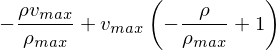

In [2]:
# On définit nos variables.
v_max, rho, rho_max = sympy.symbols('v_max, rho, rho_max')

# Expression de F.
F = v_max*rho*(-(rho/rho_max)+1)

# Calcul de la dérivée.
Fprime = F.diff(rho)

# Affichage du résultat.
Fprime

Ce qui est le même résultat que celui obtenu à la main si nous réexprimons ceci en mettant $v_{max}$ en évidence et en simplifiant quelque peu l'expression:


$\hspace{2.5cm}\frac{- \rho v_{max}}{\rho_{max}}+ v_{max} \left( - \frac{\rho}{\rho_{max}}+1 \right)$ → $v_{max} \left( 1- \frac{2 \rho}{\rho_{max}} \right)$

Ainsi, nous avons obtenu grâce à sympy :

\begin{equation}
\frac{\partial F}{\partial \rho} = v_{max} \left( 1- \frac{2 \rho}{\rho_{max}} \right) 
\end{equation}

Et l'équation (1) devient alors :

\begin{equation}
\frac{\partial \rho}{\partial t} + v_{max} \left( 1- \frac{2 \rho}{\rho_{max}} \right)  \frac{\partial \rho}{\partial x} = 0\\
\end{equation}

Nous pouvons à présent passer à la discrétisation de notre equation de convection. Pour se faire, nous utilisons comme demandé dans l'énoncé de ce travail personnel, la *forward-difference* pour la dérivée par rapport au temps et la *backward-difference* pour la dérivée par rapport à l'espace (ici, par rapport à x comme nous travaillons avec une équation à 1 dimension).

Pour rappel, les discrétisations *forward-difference* et *backward-difference* de la dérivée partielle $\frac{\partial u}{\partial x}$ (par exemple) sont données par :

* Forward-difference: si on utilise les points $x_i$ et $x_i + \Delta x$ alors la dérivée devient : $\frac{\partial u}{\partial x} \approx \frac{u(x_{i+1})-u(x_i)}{\Delta x}$.
* Backward-difference: si on utilise les points $x_i$ et $x_i- \Delta x$ alors la dérivée devient : $\frac{\partial u}{\partial x} \approx \frac{u(x_i)-u(x_{i-1})}{\Delta x}$.

Donc en appliquant ces deux discrétisations à l'équation (5) il en découle l'équation suivante:

\begin{equation}\frac{\rho_i^{n+1}-\rho_i^n}{\Delta t} + v_{max} \left( 1- \frac{2 \rho_i^{n}}{\rho_{max}} \right) \frac{\rho_i^n - \rho_{i-1}^n}{\Delta x} = 0, \end{equation}

Où la seule inconnue est $\rho_i^{n+1}$ étant donné nos conditions initiales. En isolant cette inconnue nous obtenons :

\begin{equation}
\rho_{i}^{n+1}= \rho_{i}^{n} - v_{max} \frac{\Delta t}{\Delta x} \left( 1- \frac{2 \rho_{i}^{n}}{\rho_{max}} \right) \left( \rho_{i}^n - \rho_{i-1}^n \right)
\end{equation}

Que nous pouvons maintenant traiter numériquement.


Procédons maintenant à la discrétisation de notre seconde équation, l'équation (3). À nouveau, nous utilisons les deux discrétisation demandées. Nous obtenons ainsi :

$$
\left\{
    \begin{array}{}
        \frac{\partial F}{\partial x}  \approx \frac{F_{i}^{n}-F_{i-1}^{n}}{\Delta x}\\
        \frac{\partial \rho}{\partial t}  \approx \frac{\rho_{i}^{n+1}-\rho_{i}^{n}}{\Delta x}
    \end{array}{}
\right.
$$

où
$$
\left\{
    \begin{array}{}
        F_{i}^{n} & = v_{max} \rho_{i}^{n} \left( 1- \frac{\rho_{i}^{n}}{\rho_{max}} \right)\\
        F_{i-1}^{n} & = v_{max} \rho_{i-1}^{n} \left( 1- \frac{\rho_{i-1}^{n}}{\rho_{max}} \right)
    \end{array}{}
\right.
$$

Ainsi si on réintroduit ceci dans l'équation (3) et qu'on isole la seule inconnue $\rho_i^{n+1}$, nous obtenons alors l'équation discrétisée :

\begin{equation}
\rho_{i}^{n+1}= \rho_{i}^{n} - v_{max} \frac{\Delta t}{\Delta x} \left[\rho_{i}^{n} \left( 1- \frac{ \rho_{i}^{n}}{\rho_{max}} \right) - \rho_{i-1}^n\left( 1 - \frac{ \rho_{i-1}^{n}}{\rho_{max}} \right) \right]
\end{equation}

---
##### 2. Résolution du problème suivant la discrétisation de l'équation (1).

---

#### PARTIE A .
---

Comme à notre habitude, nous commençons par importer les librairies "numpy", matplotlib et JSAnimation. Ce dernier sera utile pour "animer nos graphes".

In [3]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Nous déclarons ensuite nos données pour cette première partie à savoir la vitesse maximale du trafic,la longueur de la route,...

In [4]:
# Déclaration des variables
v_max = 80       # en km/h
L     = 11       # en km
rho_max = 250    # en voitures/km
nx    = 51
dx    = L/(nx-1)
dt    = 0.001    # h

Et nos conditions initiales, e.g. une densité de voiture décrite de la manière suivante:

In [5]:
# Conditions initiales pour la densité de trafic:

x = numpy.linspace(0,L,nx)
rho0 = numpy.ones(nx)*10
rho0[10:20] = 50

Vérifions à présent que nos conditions initiales ont été correctement initialisée en réalisant le graphique de la densité en fonction de la position.

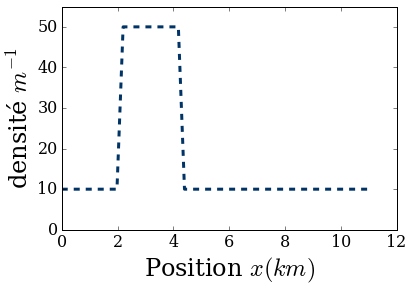

In [6]:
pyplot.ylabel('densité'' ''$m^{-1}$', fontsize=24) # nom de l'axe x & taille de la police
pyplot.xlabel('Position'' ''$x(km)$', fontsize=24) # nom de l'axe y & taille de la police
pyplot.plot(x, rho0, color='#003366', ls='--', lw=3)
pyplot.ylim(0,55);

Comme attendus, la densité de voiture au temps t = 0s est bien fixé à 50 voitures par km tandis que cette dernière est de 10 voitures par km partout ailleurs.

Nos conditions intiales étant fixées, nous pouvons commencer à répondre aux questions qui nous ont été posées.

---
1) Quelle est la vitesse minimale au temps t = 0s en m/s (arrondir à 2 décimales).

---

Commençons ici par définir une fonction pour la vitesse du trafic qui reprend simplement l'expression de l'équation (2) (que l'on a divisé par $\rho$ pour n'obtenir que l'expression recherchée de la vitesse). Cette fonction nous permettra de ressortir la vitesse du trafic pour un temps donné compte tenu de la densité à ce même moment.

In [7]:
def v(rho):

    return v_max*(1-(rho/rho_max))

Dès lors, nous pouvons utiliser cette fonction ainsi que l'une des fonctions de numpy, la fonction min(), pour calculer la vitesse minimale à l'instant inital t = 0 s. 


Remarque : Pour obtenir le résultat recherché dans les bonnes unités nous procédons à une simple convertion de nos résultats. Ceci explique la présence du facteur multiplicatif " 10/36 " ci-dessous.

Pour la suite de la résolution des questions posée nous allons définir une nouvelle fonction qui nous permettra d'évité la répétitions de lignes de codes comme l'initialisation de certain paramètre fixe, la boucle qui nous permet de calculer la densité de voiture inconnue $\rho_i^{n+1}$, etc.

Nous n'aurons ainsi plus qu'a initialisé les paramètres qui vont changer d'une similation à une autre et à rappeler notre fonction pour obtenir le résultat désiré.

Spécifions tout d'abord comment les résultats recherchés seront obtenus.
* Vitesse moyenne : celle-ci sera obtenue en prenant la moyenne des densités de la dernière étape de calcul et en 

A présent, nous pouvons calculer la vitesse moyenne à t=3min à l'aide de "numpy.mean()" appliqué à la fonction qui représente la vitesse du trafic que nous avons définit plus haut.

In [8]:
def evo(CL,t_sim,v_max,v):

    """
    
    
    
    """
    # On pose l'ensemble des paramètres qui reste fixes d'une simulation à une autre
    dt=0.001 
    nt=int(t_sim/(dt*60))+1   # Nombre de point requis dans la grille pour la simulation
    L=11                      # en km
    rho_max=250               # en voitures/km
    nx=51                     # Nombre de point de la grille d'espace
    dx=L/(nx-1)

    #On pose nos conditions intiales 
    x = numpy.linspace(0,L,nx)
    rho0 = numpy.ones(nx)*CL
    rho0[10:20] = 50
    
    # Définition de notre matrice densité pour tout temps et toute position
    
    rho=numpy.empty((nt,nx))
    rho[0]=rho0         

    #On calcul notre densité inconnue pour tout temps
    for n in range(0, nt-1):  
        rho[n+1][1:] = rho[n][1:]- dt/dx* v_max *(1-2*rho[n][1:]/rho_max)*(rho[n][1:]-rho[n][0:-1])
        rho[n+1][0]=CL   # Notre condition au bord

    #Réalise un graphe des densités finales en fonction de la position
    pyplot.plot(x, rho[nt-1], color='#003366', ls='--', lw=3)
    pyplot.ylim(0,55);
    
    #Calcul des valeurs recherché et stockage de celles-ci    
    vmoyF = v(numpy.mean(rho[nt-1]))
    vminI = min(v(rho[0,:]))
    vminF = min(v(rho[nt-1,:]))
    
    
    u[0]=vminI
    u[1]=vminF
    u[2]=vmoyF

In [9]:
CL=10
u=numpy.empty(3)

→ Vitesse minimale du trafic à l'instant t = 0s : v = 17.78 m/s


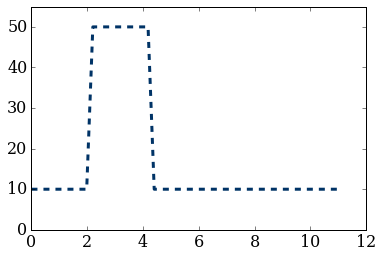

In [10]:
t_sim=0
evo(CL,t_sim,v_max,v)
print ("→ Vitesse minimale du trafic à l'instant t = 0s : v =",round(u[0]*10/36,2),"m/s")

---
2) Quelle est la vitesse moyenne au temps t = 180s en m/s (arrondir à 2 décimales).

---

Pour répondre à cette 2e question, il nous faut spécifier un temps de simulation (de 3 min pour cette première partie). De là, nous pourrons calculer le nt (le nombre de point de notre "grille temporelle") nécessaire à la détermination de la densité au temps associé. Nous avons donc le code suivant:

→ Vitesse moyenne du trafic à l'instant t = 180s : v = 20.56 m/s


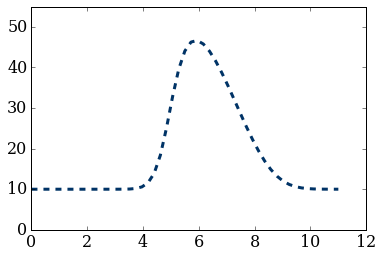

In [11]:
t_sim=3
evo(CL,t_sim,v_max,v)
print ("→ Vitesse moyenne du trafic à l'instant t = 180s : v =",round(u[2]*10/36,2),"m/s")

En esquissant le graphe de la densité en fonction de la distance, nous observons que le signal carré de départ est devenu un signal plus courbé (comme vu dans les leçons) #discussion à suivre

Pour bien visualiser la solution, nous pouvons annimer le graphe afin de voir que la densité varie au cours du temps.


ANIM

In [12]:
#fig = pyplot.figure(figsize=(8,5))
#ax = pyplot.axes(xlim=(0,20), ylim=(0,60))
#line = ax.plot([], [], color='#003366', ls='--', lw=3)[0]

#def trafic(i):
    #line.set_data(x,rho0)
    
    #rhon = rho0.copy() 
    #rho0[1:] = rhon[1:]-((dt/dx) * v_max*(1-((2/rho_max)*rhon[1:]))*(rhon[1:]-rhon[0:-1]))
    #rho0[0]=10

#animation.FuncAnimation(fig, trafic,
                        #frames=nt, interval=10)

---
3) Quelle est la vitesse minimale au temps t = 360s en m/s (arrondir à 2 décimales).

---

→ Vitesse minimale du trafic à l'instant t = 180s : v = 18.58 m/s


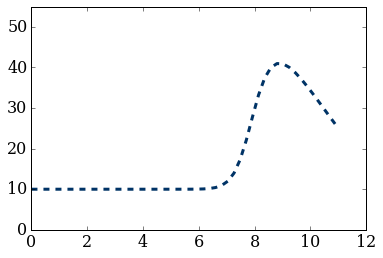

In [13]:
t_sim=6
evo(CL,t_sim,v_max,v)
print ("→ Vitesse minimale du trafic à l'instant t = 180s : v =",round(u[1]*10/36,2),"m/s")

---

#### PARTIE B.
---

In [14]:
# Déclaration des variables

v_max = 136       # en km/h
L     = 11       # en km
rho_max = 250    # en voitures/m
nx    = 51      # Nombre de point de la grille d'espace
CL    = 20
v_max = 136


In [15]:
x = numpy.linspace(0,L,nx)
rho02 = numpy.ones(nx)*20 
rho02[10:20] = 50

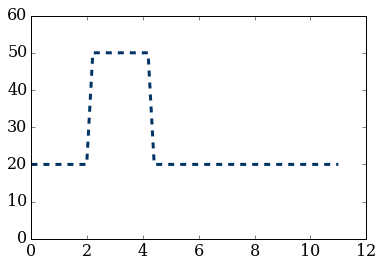

In [16]:
pyplot.plot(x, rho02, color='#003366', ls='--', lw=3)
pyplot.ylim(0,60);

---
4) Quelle est la vitesse minimale au temps t = 0s en m/s (arrondir à 2 décimales).

---

→ Vitesse minimale du trafic à l'instant t = 0s : v = 30.22 m/s


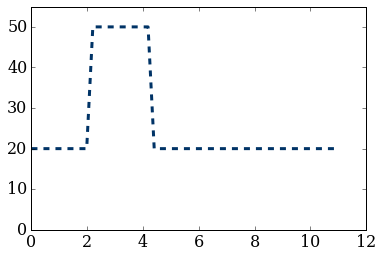

In [17]:
t_sim=0
evo(CL,t_sim,v_max,v)
print ("→ Vitesse minimale du trafic à l'instant t = 0s : v =",round(u[0]*10/36,2),"m/s")

---
5) Quelle est la vitesse moyenne au temps t = 180s en m/s (arrondir à 2 décimales).

---

→ Vitesse minimale du trafic à l'instant t = 180s : v = 33.77 m/s


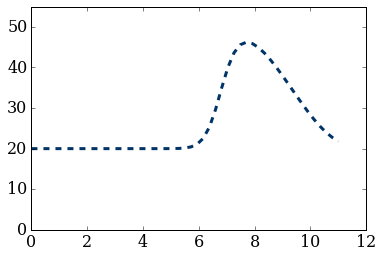

In [18]:
t_sim=3
evo(CL,t_sim,v_max,v)
print ("→ Vitesse minimale du trafic à l'instant t = 180s : v =",round(u[2]*10/36,2),"m/s")

---
6) Quelle est la vitesse minimale au temps t = 180s en m/s (arrondir à 2 décimales).

---

In [19]:
t_sim=3
print ("→ Vitesse minimale du trafic à l'instant t = 180s : v =",round(u[1]*10/36,2),"m/s")

→ Vitesse minimale du trafic à l'instant t = 180s : v = 30.79 m/s


---
##### 3. Résolution du problème suivant la discrétisation de l'équation (3).

---

#### PARTIE A .
---

Pour rappel, dans la partie A nous avons les conditions suivantes:

In [40]:
# Déclaration des variables

v_max = 80       # en km/h
L     = 11       # en km
rho_max = 250    # en voitures/m
nx    = 51      # Nombre de point de la grille d'espace
CL    = 10      #condition limite

# Déclaration d'un tableau qui va contenir les vitesses 
w=numpy.empty(3)

On définit une nouvelle fonction pour notre nouvelle discrétisation

In [41]:
def evo2(CL,t_sim,v_max,v):

    """
    
    
    
    """
    # On pose l'ensemble des paramètres qui reste fixes d'une simulation à une autre
    dt=0.001 
    nt=int(t_sim/(dt*60))+1   # Nombre de point requis dans la grille pour la simulation
    L=11                      # en km
    rho_max=250               # en voitures/km
    nx=51                     # Nombre de point de la grille d'espace
    dx=L/(nx-1)

    #On pose nos conditions intiales 
    x = numpy.linspace(0,L,nx)
    rho0 = numpy.ones(nx)*CL
    rho0[10:20] = 50
    
    # Définition de notre matrice densité pour tout temps et toute position
    
    rho=numpy.empty((nt,nx))
    rho[0]=rho0         

    #On calcul notre densité inconnue pour tout temps
    for n in range(0, nt-1):  
        rho[n+1][1:] = rho[n][1:]-((dt/dx)*v_max*((rho[n][1:]*(1-(rho[n][1:]/rho_max)))-(rho[n][0:-1]*(1 - (rho[n][0:-1]/rho_max)))))
        rho[n+1][0]=CL   # Notre condition au bord

    #Réalise un graphe des densités finales en fonction de la position
    pyplot.plot(x, rho[nt-1], color='#003366', ls='--', lw=3)
    pyplot.ylim(0,55);
    
    #Calcul des valeurs recherché et stockage de celles-ci    
    vmoyF = v(numpy.mean(rho[nt-1]))
    vminI = min(v(rho[0,:]))
    vminF = min(v(rho[nt-1,:]))
    
    
    w[0]=vminI
    w[1]=vminF
    w[2]=vmoyF

---
1) Quelle est la vitesse minimale au temps t = 0s en m/s (arrondir à 2 décimales).

---

→ Vitesse minimale du trafic à l'instant t = 0s : v = 17.78 m/s


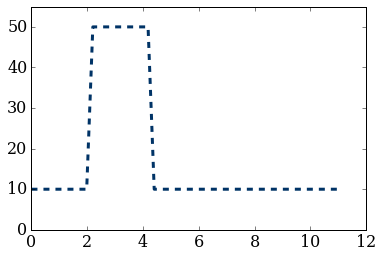

In [42]:
t_sim=0
evo2(CL,t_sim,v_max,v)
print ("→ Vitesse minimale du trafic à l'instant t = 0s : v =",round(w[0]*10/36,2),"m/s")

---
2) Quelle est la vitesse moyenne au temps t = 180s en m/s (arrondir à 2 décimales).

---

→ Vitesse moyenne du trafic à l'instant t = 180s : v = 20.64 m/s


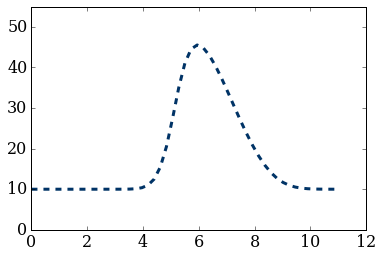

In [37]:
t_sim=3
evo2(CL,t_sim,v_max,v)
print ("→ Vitesse moyenne du trafic à l'instant t = 180s : v =",round(w[2]*10/36,2),"m/s")

---
3) Quelle est la vitesse minimale au temps t = 360s en m/s (arrondir à 2 décimales).

---

→ Vitesse minimale du trafic à l'instant t = 360s : v = 18.78 m/s


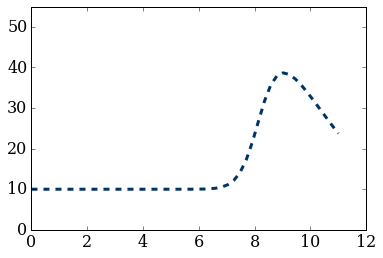

In [38]:
t_sim=6
evo2(CL,t_sim,v_max,v)
print ("→ Vitesse minimale du trafic à l'instant t = 360s : v =",round(w[1]*10/36,2),"m/s")

---

#### Partie B
---

Comme nous l'avions fait dans la partie sur la résolution avec notre première discrétisation, nous rappelons les conditions du problème dans la partie B de l'exercice.

In [45]:
# Déclaration des variables

v_max = 136       # en km/h
L     = 11       # en km
rho_max = 250    # en voitures/m
nx    = 51      # Nombre de point de la grille d'espace
CL    = 20

# Déclaration d'un tableau qui va contenir les vitesses 
w=numpy.empty(3)

---
4) Quelle est la vitesse minimale au temps t = 0s en m/s (arrondir à 2 décimales).

---

→ Vitesse minimale du trafic à l'instant t = 0s : v = 30.22 m/s


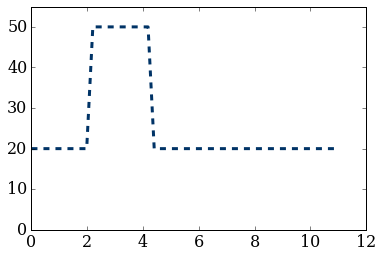

In [46]:
t_sim=0
evo2(CL,t_sim,v_max,v)
print ("→ Vitesse minimale du trafic à l'instant t = 0s : v =",round(w[0]*10/36,2),"m/s")

---
5) Quelle est la vitesse moyenne au temps t = 180s en m/s (arrondir à 2 décimales).

---

→ Vitesse moyenne du trafic à l'instant t = 180s : v = 33.87 m/s


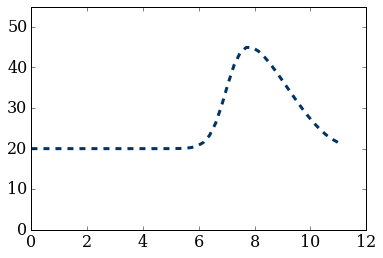

In [47]:
t_sim = 3
evo2(CL,t_sim,v_max,v)
print ("→ Vitesse moyenne du trafic à l'instant t = 180s : v =",round(w[2]*10/36,2),"m/s")

---
6) Quelle est la vitesse minimale au temps t = 180s en m/s (arrondir à 2 décimales).

---

In [48]:
t_simu = 3
print ("→ Vitesse minimale du trafic à l'instant t = 180s : v =",round(w[1]*10/36,2),"m/s")

→ Vitesse minimale du trafic à l'instant t = 180s : v = 30.99 m/s


---

##### 4. Analyse et comparaisons des résultats:
---

Nous allons tout d'abord comparer les résultats obtenus dans chaque partie (A et B) pour une discrétisation donné puis pour chaque discrétisations. Nous verrons par la suite ce que nous pouvons en déduire. 

$\rightarrow$ Comparaisons des résultats entre la partie A et B pour les deux discrétisations :

On constate que le changement des conditions aux bords (passage de 10 à 20 voiture/$km$) et une augmentation de la vitesse maximale du trafic implique une augmentation des valeurs pour les vitesses demandées.


$\rightarrow$ Comparaisons des résultats obtenus à partir de deux discrétisations différentes :

---

##### 5. Source:
---


[1] Cours de MATH-F-101 (Calcul Différentiel et Intégral 1) présenté par M. Joel Fine et M. Denis Bonheure à l'ULB.

[2] Notebook *02.04 - 1D Burgers* de la série *Space and Time — Introduction to Finite-difference solutions of PDEs*

---

###### The cell below loads the style of the notebook.

In [29]:
from IPython.core.display import HTML
css_file = '../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())